# Actividad N° 05: iFood

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *marketing-campaign.csv* de iFood. El objetivo de la actividad es validar los modelos de clasificación y regresión utilizados para predecir distintas variables.

# Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## Consideraciones

Repliquen este notebook para la resolución del ejercicio. Consideren las etapas:

1) Cargamos los datos

2) Preparación de la data

3) Clasificación

4) Regresión

5) Guardar un modelo.

**Podemos decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.

# Código

#### Importación de librerías y de los datos

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

from funpymodeling.exploratory import status
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [108]:
data = pd.read_csv("../ejercicios-de-ejemplo/05/resolucion-tarea/marketing_campaign.csv", sep=';', index_col=0)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [109]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Dt_Customer,0,0.000000,0,0.000000,663,object
7,Recency,0,0.000000,28,0.012500,100,int64
8,MntWines,0,0.000000,13,0.005804,776,int64
9,MntFruits,0,0.000000,400,0.178571,158,int64


#### Descarte de registros con variable objetivo nula

In [110]:
discarded_data = data[data["Income"].isna()]
data = data[data["Income"].notna()]

#### Chequeo de algunas variables

In [111]:
print("Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías")
data[data["MntGoldProds"] > (data["MntFishProducts"] + data["MntMeatProducts"] + data["MntFruits"] + data["MntSweetProducts"] + data["MntWines"])][["MntGoldProds","MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines"]]

Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías


,MntGoldProds,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines
ID,,,,,,
4246,262,4,26,11,3,67
6237,291,5,33,4,2,81
10311,321,2,12,4,4,16


In [112]:
print("Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad")
data["Response"].sum() / data.shape[0]

Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad


0.15027075812274368

#### Eliminamos la columna fecha y otras con valores únicos

In [113]:
columnas_a_eliminar = ['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data = data.drop(columns=columnas_a_eliminar)

In [114]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


#### Transformamos columnas object a numéricas, ya que son pocos valores

In [115]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [116]:
class_map = {'Single':0, 'Married':1, 'Together':1, 'Divorced':2, 'Widow':3, 'Alone':0, 'Absurd':0, 'YOLO':0}
data['Marital_Status'] = data['Marital_Status'].map(class_map)

# Quizás hubiese convenido aplicar One Hot Encoding

In [117]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [118]:
class_map = {'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4}
data['Education'] = data['Education'].map(class_map)

# Si tuvieramos el orden de la etapa más básica a la más especializada, podríamos ordenarlas
# Sin ese orden, quizás hubiese convenido aplicar One Hot Encoding

In [119]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,1116,0.503610,5,int64
1,Marital_Status,0,0.0,478,0.215704,4,int64
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


## Clasificación
Variable target: Response

### Random Forest Classifier

In [120]:
x_data_classification = data.drop('Response', axis=1)
y_data_classification = data['Response']

x_data_classification = x_data_classification.values
y_data_classification = y_data_classification.values

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x_data_classification, y_data_classification, test_size=0.3, random_state=42)

In [121]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

rfc.fit(x_train_classification, y_train_classification)
y_train_classification_pred = rfc.predict(x_train_classification)

In [122]:
pred_probs = rfc.predict_proba(x_train_classification)
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [123]:
# Nos quedamos solo con la probabilidad de que cada registro sea = 1
y_probs_tr = pred_probs[: ,1]

In [124]:
y_probs_tr 

array([0.  , 0.6 , 0.01, ..., 0.01, 0.08, 0.1 ])

In [125]:
with open('rfc.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Matriz de Confusión

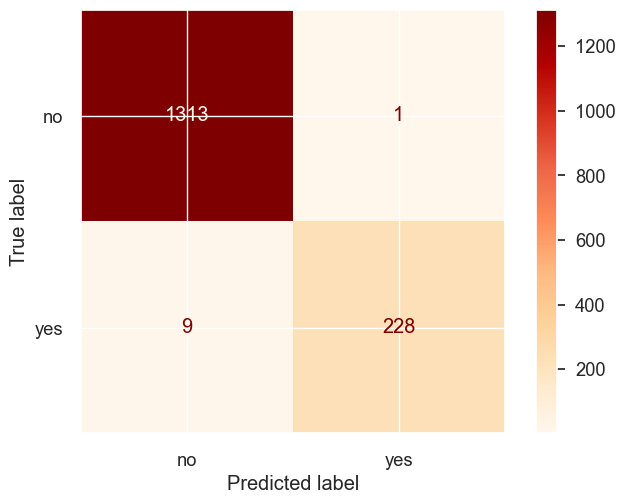

In [126]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

# atención, asume 0.5 como punto de corte
ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','yes'],
    cmap='OrRd',
    )

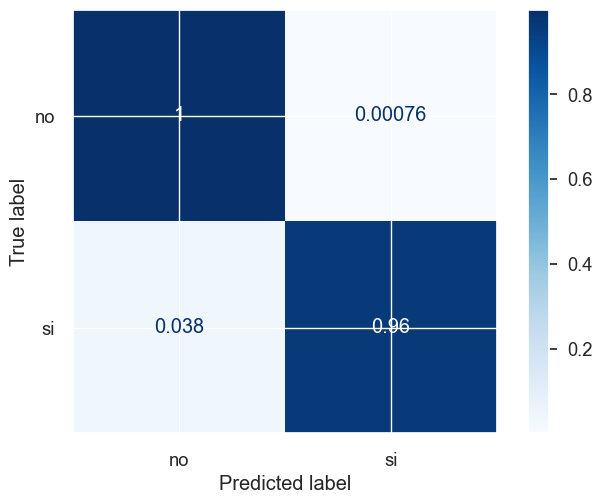

In [127]:
ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true', # Para ver el porcentaje de predicción correcto de cada etiqueta ("si" y "no")
    )

In [128]:
y_pred1=rfc.predict(x_train_classification)

conf_mat1=pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025


In [129]:
pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize= True)

Pred,0,1
Actual,,
0,0.846551,0.000645
1,0.005803,0.147002


#### Variar el punto de corte

In [130]:
y_probs_tr.mean()


0.15387792054281418

In [131]:
y_preds2=np.where(y_probs_tr > 0.15, 1, 0)

In [132]:
conf_mat2=pd.crosstab(index=y_train_classification, 
                      columns=y_preds2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

print(conf_mat2)

Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Comparo el antes y el después

In [133]:
print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Con el corte en 0.5 tengo más presición con los negativos y menos con los positivos.</br>
Con el corte en 0.15 tengo 4.4% falsos negativos pero no tengo falsos positivos. </br>
Para este caso por tratarse de una campaña de marketing, es más útil que las predicciones de efectividad de ventas minimice los falsos positivos, ya que los falsos negativos no representan una pérdida sino una ganancia. Pero busquemos mejorar ese 4.4% sin perder presición con los Verdaderos Positivos, aumentando el punto de corte hasta dar con el mejor.

In [134]:
y_preds3= np.where(y_probs_tr > 0.35, 1, 0)
conf_mat3=pd.crosstab(index=y_train_classification,
                      columns=y_preds3,
                      rownames=['Actual'],
                      colnames=['Pred 0.35'],
                      normalize='index')

print(conf_mat3)

Pred 0.35         0         1
Actual                       
0          0.991629  0.008371
1          0.000000  1.000000


En 0.35 se consigue bajar a 0.8% los falsos negativos y se mantiene en 0 los falsos positivos. Que encaja con el lugar donde convergen el Presicion, Recall y F1 en el siguiente gráfico:

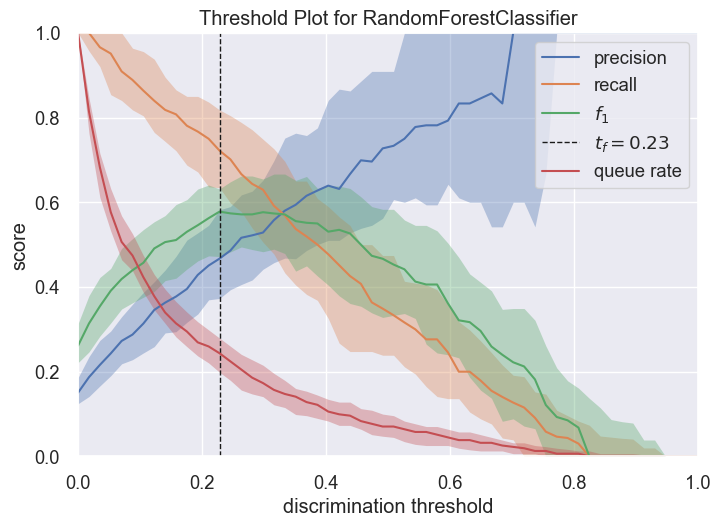

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [136]:
visualizer = DiscriminationThreshold(rfc)

visualizer.fit(x_train_classification, y_train_classification)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

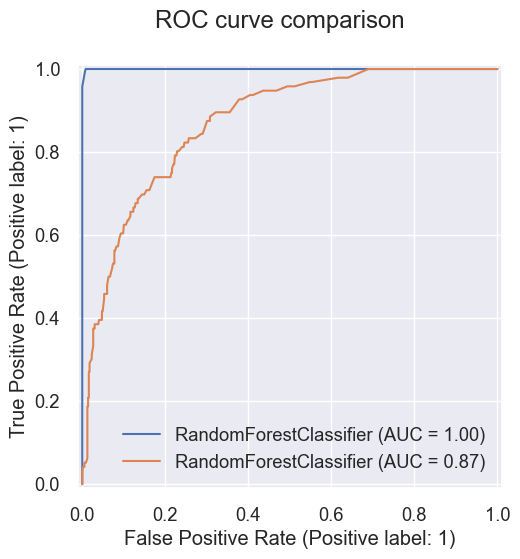

In [137]:
tr_disp = RocCurveDisplay.from_estimator(rfc, x_train_classification, y_train_classification)
ts_disp = RocCurveDisplay.from_estimator(rfc, x_test_classification, y_test_classification, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## Regresión
Variable target: Income

### Regresión Lineal

In [230]:
x_data_reg = data.drop('Income', axis=1)
y_data_reg = data['Income']

x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [231]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_data_reg, y_data_reg, test_size=0.3, random_state=42)

In [232]:
model_reg = LinearRegression()
model_reg.fit(x_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [233]:
pred_tr_reg = model_reg.predict(x_train_reg)
pred_ts_reg = model_reg.predict(x_test_reg)

In [234]:
with open('lr.pickle', 'wb') as handle:
    pickle.dump(model_reg, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Random Forest Regressor

In [235]:
model_rfr = RandomForestRegressor(random_state=42)

#### Randomized Search CV

Dejo comentado las siguientes celdas para evitar crear y entrenar nuevamente el modelo. Abajo dejé un pickle.load para obtenerlo.

In [236]:
# random_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
#     'max_features': [1.0], # Probé con el valor "sqrt" pero daba overfitting
#     'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# rf_random = RandomizedSearchCV(estimator = model_rfr, param_distributions = random_grid, scoring="neg_mean_absolute_error", n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1) # Fit the random search model

In [237]:
# rf_random.fit(x_train_reg, y_train_reg)

In [238]:
# with open("random_rfr.pickle", 'wb') as handle:
#     pickle.dump(rf_random, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [239]:
with open("random_rfr.pickle", 'rb') as handle:
    rf_random = pickle.load(handle)

rf_random

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': [1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,100
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [240]:
print("Error en train")
print(rf_random.score(x_train_reg,y_train_reg))
print("Error en test")
print(rf_random.score(x_test_reg,y_test_reg))

Error en train
-2419.0662741900446
Error en test
-6135.65390351732


#### Grid Search CV basada en lo obtenido con Randomized Search

Dejo comentado las siguientes celdas para evitar crear y entrenar nuevamente el modelo. Abajo dejé un pickle.load para obtenerlo.

In [241]:
# param_grid = {
#     'bootstrap': [True], # Base: True
#     'max_depth': [40, 50, 60, 70, 80], # Base: 60
#     'max_features': [1.0], # Base: 1.0
#     'min_samples_leaf': [1, 2, 3], # Base: 1
#     'min_samples_split': [2, 3, 4], # Base: 2
#     'n_estimators': [700, 750, 800] # Base: 733
# }

# grid_search = GridSearchCV(estimator = model_rfr, param_grid = param_grid, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1, verbose = 2)

In [242]:
# grid_search.fit(x_train_reg, y_train_reg)

In [243]:
# Guardar el modelo
# with open('rfr.pickle', 'wb') as handle:
#     pickle.dump(grid_search, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [244]:
with open("rfr.pickle", 'rb') as handle:
    grid_search = pickle.load(handle)
    
rfr_final_model = grid_search.best_estimator_

In [245]:
rfr_final_model

,n_estimators,750
,criterion,'squared_error'
,max_depth,40
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [246]:
print("RandomizerSearch: Mejor combinación")
print("Score en Train: " + str(rf_random.score(x_train_reg, y_train_reg)))
print("Score en Test: " + str(rf_random.score(x_test_reg, y_test_reg)))
print()
print("GridSearch: Mejor combinación")
print("Score en Train: " + str(grid_search.score(x_train_reg, y_train_reg)))
print("Score en Test: " + str(grid_search.score(x_test_reg, y_test_reg)))

RandomizerSearch: Mejor combinación
Score en Train: -2419.0662741900446
Score en Test: -6135.65390351732

GridSearch: Mejor combinación
Score en Train: -2420.316312916398
Score en Test: -6129.368122305765


#### Combinatoria de parámetros

In [247]:
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(grid_search.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=True)

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,neg_mean_absolute_error
134,True,80,1.0,3,4,800,-6659.418064
104,True,70,1.0,3,3,800,-6659.418064
101,True,70,1.0,3,2,800,-6659.418064
80,True,60,1.0,3,4,800,-6659.418064
77,True,60,1.0,3,3,800,-6659.418064
...,...,...,...,...,...,...,...
55,True,60,1.0,1,2,750,-6575.884426
82,True,70,1.0,1,2,750,-6575.884426
1,True,40,1.0,1,2,750,-6575.884426
28,True,50,1.0,1,2,750,-6575.884426


### Gráfico de Prediction Error

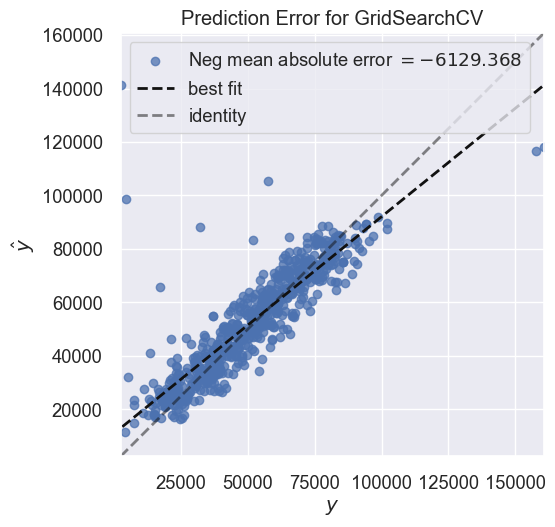

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [248]:
vis_pred_err = PredictionError(grid_search)

vis_pred_err.fit(x_train_reg, y_train_reg)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test_reg, y_test_reg)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

### Gráfico de Residuos

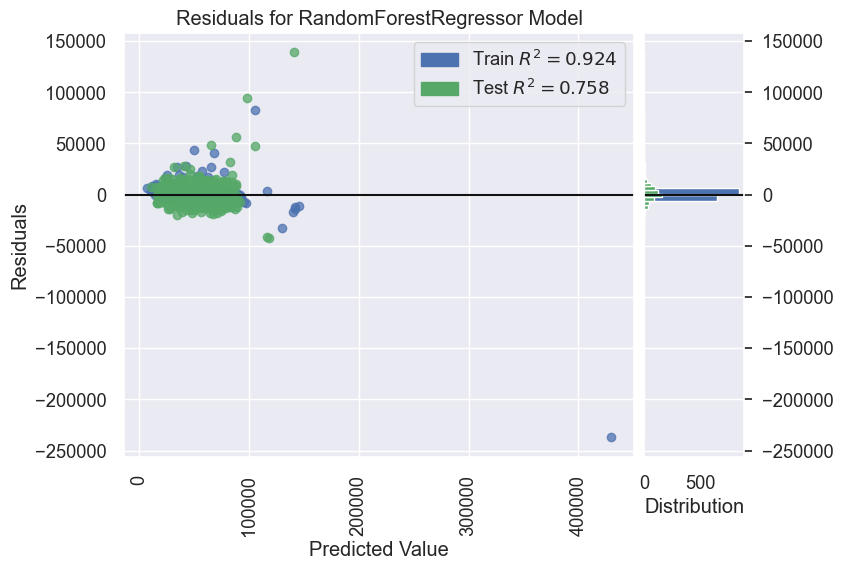

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [249]:
vis_res = ResidualsPlot(rfr_final_model)

# Copy-paste de la doc oficial: 
vis_res.fit(x_train_reg, y_train_reg)  # Fiteamos los datos al visualizador
vis_res.score(x_test_reg, y_test_reg)  # Calculamos las métricas para test

plt.xticks(rotation=90)                # rotamos etiquetas eje x

vis_res.show()                 # Visualizamos!